## Evaluating the model

### Introduction

In the previous section, we discussed our basketball player who models the relationship between shot angle and distance.

<img src="basketball-shooting.jpg">

We expressed this model as a mathematical formula:  

$$ distance = 40 * angle $$

And as a function:

In [1]:
def predicted_distance(angle):
    return 40*angle

And finally as a line on our graph.

In this lesson, we'll learn how to evaluate if our model is any good.

### Evaluating our model

Let's take another look at our graph.  

> Please focus on the graph, and ignore the code below.

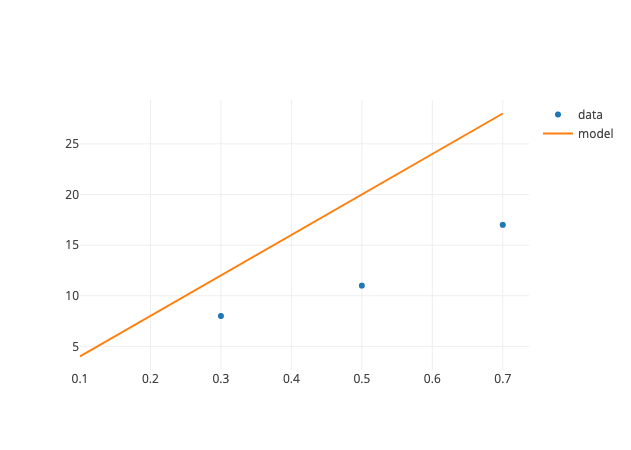

In [4]:
from graph import trace_values, plot
angles = [.1, .2, .3, .4, .5, .6, .7]
predicted_distances = list(map(lambda angle: 40 * angle, angles))
data_trace = trace_values([.30, .50, .70], [8, 11, 17], name = 'data')
model_trace = trace_values(angles, predicted_distances, mode = 'lines', name = 'model')
layout = {'yaxis': {'range': [0, 18], 'title': 'shot distance'}, 'xaxis': {'title': 'shot angle'}}
plot([data_trace, model_trace])

So remember that the blue dots represent the actual data of each shot angle and it's corresponding distance.  And we use the orange line, our model, to approximate the relationship between angle and distance.

We say that we are doing a good job of this, the closer that our orange line is to our blue dots.

Let's make this more explicit.

> Please ignore the code used to produce the below plot.

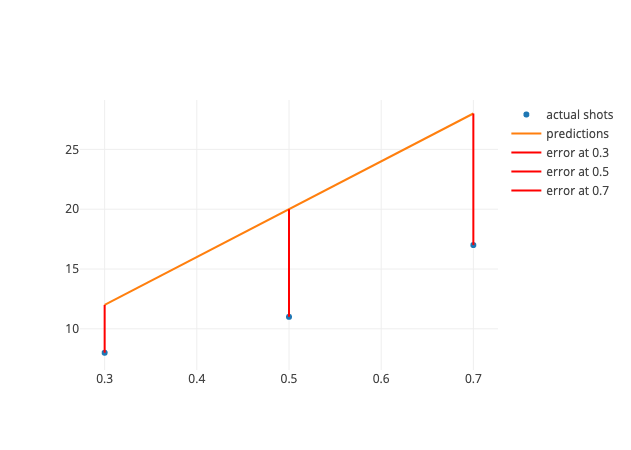

In [10]:
from linear_equations import build_regression_line
from graph import m_b_trace, plot, m_b_data, trace_values
from error import error_line_traces

from graph import trace_values, plot
layout = {'yaxis': {'range': [0, 18], 'title': 'shot distance'}, 'xaxis': {'title': 'shot angle'}}
observed_shot_angles = [.30, .50, .70]
observed_distances = [8, 11, 17]

inputs = [.30, .40, .50, .60, .70]
predictions = list(map(lambda angle: 40*angle,inputs))
actual_trace = trace_values(observed_shot_angles, observed_distances, name = 'actual shots')
predictions_trace = trace_values(inputs, predictions, 'lines', name = 'predictions')
errors = [-4, -9, -11]
error_traces = error_line_traces(observed_shot_angles, observed_distances, errors)
plot([actual_trace, predictions_trace] + error_traces)

Now each red line represents the difference between what our model predicts for a given angle, and what we actually saw.  

Let's focus in on that first red line.  The model predicts a distance of -- 13.5 feet-- and  the actual shot distance for an angle of .3 was 8 feet.  The red line shows the difference.  

Now let's turn these red lines into a number.  We do this by calculating the *difference* between the actual data and what our model expects.  We call this difference our **error**.

> error = actual - expected

| angle        | actual distance | expected distance | error           
| ------------- |:-------------:| :-------------:| :-------------:| 
|    .30        | 8 feet | 12 feet | $8 - 12 = - 4$ | 
|    .50        | 11 feet | 20 feet | $11 - 20 = - 9$ | 
|    .70        | 17 feet | 28 feet | $17 - 28 = - 11$ | 

Ok so we can see that our error for the first point is $8 - 12 = -4$.  And we can even calculate the **total error** of our model, just by adding these numbers up. 

$$total\_error = -4 + -9 + -11 = - 24$$

We don't really care whether our numbers are positive or negative, what we care is whether just how close the number is to zero.  The closer the number is to zero the better we do.  

After all, if our model perfectly predicts our first distance of 8 feet, then this means that $error = actual - expected = 8 - 8 = 0$.

### One small problem

Now let's change our model so that we change $$ distance=40∗angle $$ 

to: 

$ distance=25∗angle $ 

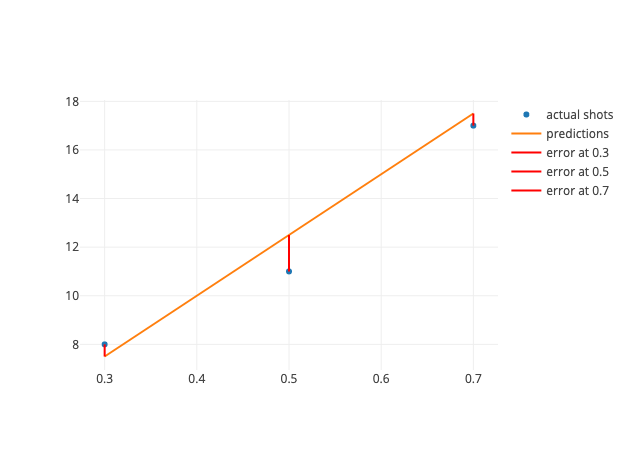

In [20]:
from linear_equations import build_regression_line
from graph import m_b_trace, plot, m_b_data, trace_values
from error import error_line_traces

from graph import trace_values, plot
layout = {'yaxis': {'range': [0, 18], 'title': 'shot distance'}, 'xaxis': {'title': 'shot angle'}}
observed_shot_angles = [.30, .50, .70]
observed_distances = [8, 11, 17]

inputs = [.30, .40, .50, .60, .70]
predictions = list(map(lambda angle: 25*angle, inputs))
actual_trace = trace_values(observed_shot_angles, observed_distances, name = 'actual shots')
predictions_trace = trace_values(inputs, predictions, 'lines', name = 'predictions')
errors = [.5, -1.5, -.5]
error_traces = error_line_traces(observed_shot_angles, observed_distances, errors)
plot([actual_trace, predictions_trace] + error_traces)

Now let's recalculate our total error.

First we calculate the error at each data point.

| angle        | actual distance | expected distance | error           
| ------------- |:-------------:| :-------------:| :-------------:| 
|    .30        | 8 feet | 7.5 feet | $8 - 7.5  = .5 $ | 
|    .50        | 11 feet | 12.5 feet | $11 - 12.5 = - 1.5 $ | 
|    .70        | 17  feet | 17.5 feet | $17 - 17.5 = -.5 $ | 

So notice that our model misses the distances for each point.  And adding up our total error we get: 

.5 - 1.5 - .5 = -1.5.

This is quite odd.  Our total error equals the error that we just got at our second point, - 1.5.

The problem that we have is that our first two errors cancel each other out.  This isn't good.  We want our total error to increase each time that our predicted distance differs from our actual distance.  We don't want our errors to cancel each other out.

We fix this by simply making each error positive, which we do by squaring the error.  $.5^2 + -1.5^2 + .5^2 = .25 + 2.25 +  .25 = 2.75$.

So now, because each individual squared error is always positive, they will not cancel each other out.  We call this the **sum of the squared errors** (SSE).

### Comparing models

And now that we have expressed how well a model predicts our data, we can start to compare models to data.  For example, we go back and calculate the SSE for our first model of $$ distance=40∗angle $$.

| angle        | actual distance | expected distance | squared error           
| ------------- |:-------------:| :-------------:| :-------------:| 
|    .30        | 8 feet | 12 feet | $8 - 12 = 16$ | 
|    .50        | 11 feet | 20 feet | $11 - 20 = 81$ | 
|    .70        | 17 feet | 28 feet | $17 - 28 = 121$ | 

And we saw that the model predicted our later dataset with a sum of squared error of 266. So because the SSE is smaller with our second model, we can see that our second model is better fit to the data than our first model.

### Summary

In this lesson, we saw how to evaluate a machine learning model.  We do this by seeing how well the model matches the actual data.  The closer the model is to the data, the better our model.  

We can summarize how well the model fits the data by calculating the error at each of our actual data points, where our $error =  actual - expected$.  We add up the error at each datapoint to calculate the **total error**.

Then we saw that **total error** has a flaw, where the errors can cancel each other out when some errors are positive and others are negative.  To fix this, we make each of our errors positive by squaring each error.  And then we add up our squared errors to calculate the **sum of the squared errors** (SSE).  We can use our SSE score to try different models and then choose the one with the lowest score.